# 数据绘图要点6-数据组过多

比较几个数值变量的分布是数据展示中的一项常见任务。变量的分布可以使用直方图或密度图来表示，在同一轴上表示适量数据的组是非常有吸引力的。但是数据组过多将严重影响图表信息表现。

## 数据分布绘图实例
下面是一个示例，展示了人们如何感知词汇。短语“Highly likely”表示什么情况的概率问题。以下是人们给出概率分数分布结果。

In [100]:
# 加载库
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(patchwork)

# 加载数据
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")
# 处理数据
data <- data %>% 
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0))
head(data)
nrow(data)

,text,value
,<chr>,<dbl>
1,Almost Certainly,95
2,Almost Certainly,95
3,Almost Certainly,95
4,Almost Certainly,95
5,Almost Certainly,98
6,Almost Certainly,95


[1] 782

In [101]:
# 建立数据标注框
annot <- data.frame(
  text = c("Almost No Chance", "About Even", "Probable", "Almost Certainly"),
  x = c(5, 53, 65, 79),
  y = c(0.15, 0.4, 0.06, 0.1)
)

In [102]:
# 提取部分数据进行展示
data1 <-filter(data,text %in% c("Almost No Chance", "About Even", "Probable", "Almost Certainly")) 
data1 <-mutate(data1,text = fct_reorder(text, value))
head(data1)
nrow(data1)

,text,value
,<fct>,<dbl>
1,Almost Certainly,95
2,Almost Certainly,95
3,Almost Certainly,95
4,Almost Certainly,95
5,Almost Certainly,98
6,Almost Certainly,95


[1] 184

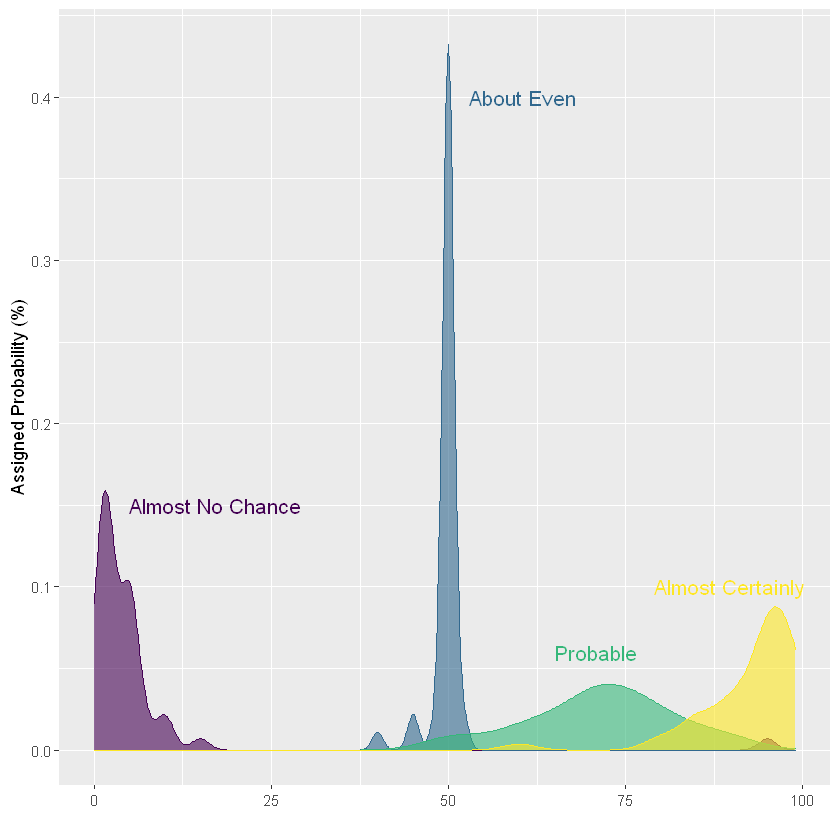

In [103]:
# 绘图
ggplot(data1, aes(x=value, color=text, fill=text)) +
geom_density(alpha=0.6) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
geom_text( data=annot, aes(x=x, y=y, label=text, color=text), hjust=0, size=4.5) +
theme(
  legend.position="none",
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8)
) +
xlab("") +
ylab("Assigned Probability (%)")

在这种情况下，图形非常整洁。人们给"Highly likely"表示"Almost No chance"这句话的概率在0%到20%之间，而表示"Almost Certainly"这句话的概率在 75%到100% 之间。但是当我们看看表示更多数据组会发生什么。

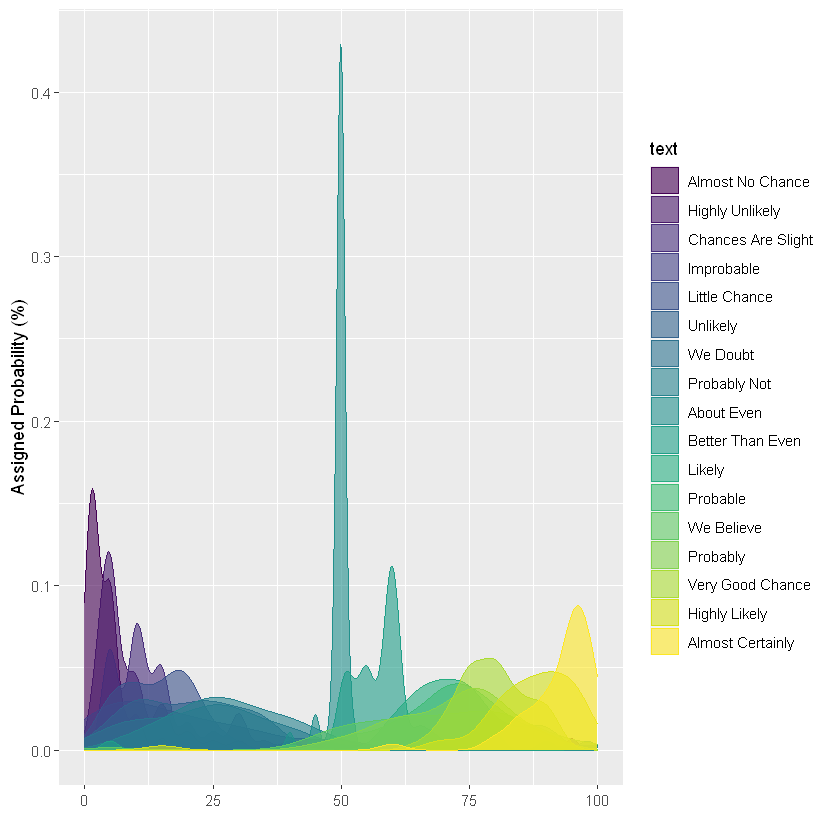

In [104]:
# Plot
data2<-mutate(data,text = fct_reorder(text, value)) 
ggplot(data2,aes(x=value, color=text, fill=text)) +
# 绘制密度图
geom_density(alpha=0.6) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
theme(
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8)
) +
xlab("") +
ylab("Assigned Probability (%)")

现在可以看到这个图过于杂乱了，无法区分组：在同一个图形上表示的数据组太多。如何避免这种情况？我们将在下一节介绍几种解决办法。

## 解决方法

### 箱形图

表示这种数据集的最常见方法是boxplot。它总结了每个组的主要特征，从而实现了高效的分布。请注意一些陷阱。对组进行排序以使图表更易于阅读通常是有意义的。如果组标签很长，请考虑使标签可读的水平版本。不过箱形图箱隐藏了样本大小的基本分布等信息，可以使用不显眼的点显示各个数据点。

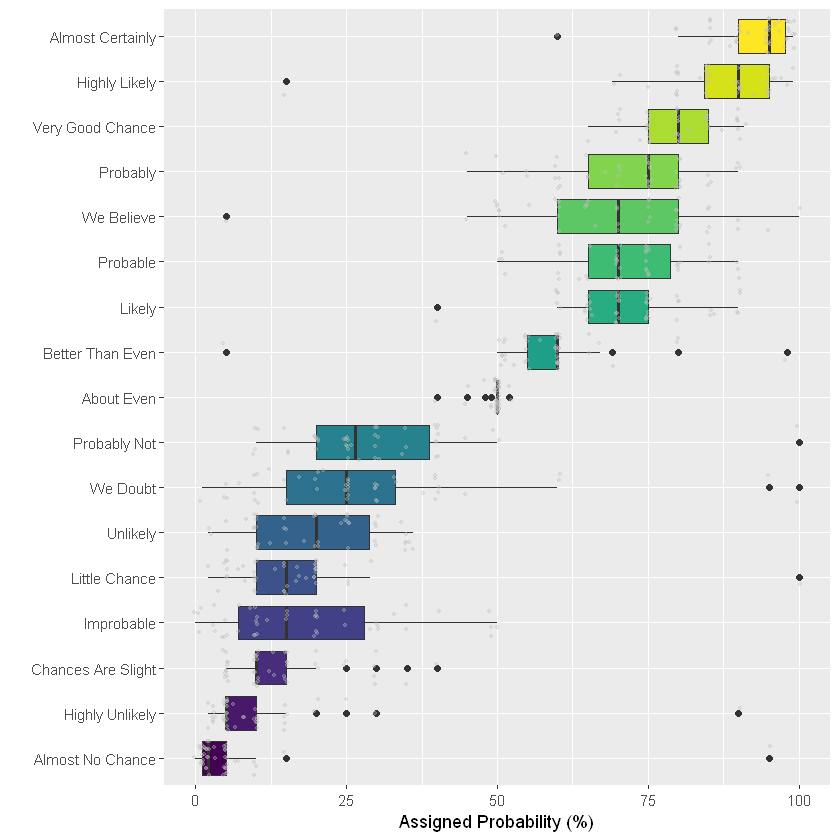

In [105]:
ggplot(data2, aes(x=text, y=value, fill=text)) +
# 绘制箱形图
geom_boxplot() +
# 添加数据点
geom_jitter(color="grey", alpha=0.3, size=0.9) +
scale_fill_viridis(discrete=TRUE) +
theme(
  legend.position="none"
) +
# xy轴翻转
coord_flip() +
xlab("") +
ylab("Assigned Probability (%)")

### 小提琴图

只要样本量足够大，小提琴图通常是箱形图的良好替代品。它与箱形图非常接近，只是它通过定义更准确地描述了组分布。如果你有很多组，小提琴图可能不是最好的选择，因为小提琴图中每个数据组的展示结果往往都非常纤细，这使得很难想象其分布。在这种情况下，一个很好的替代方案是山脊图，这将在本文中进一步描述。

Warning message:
"position_dodge requires non-overlapping x intervals"


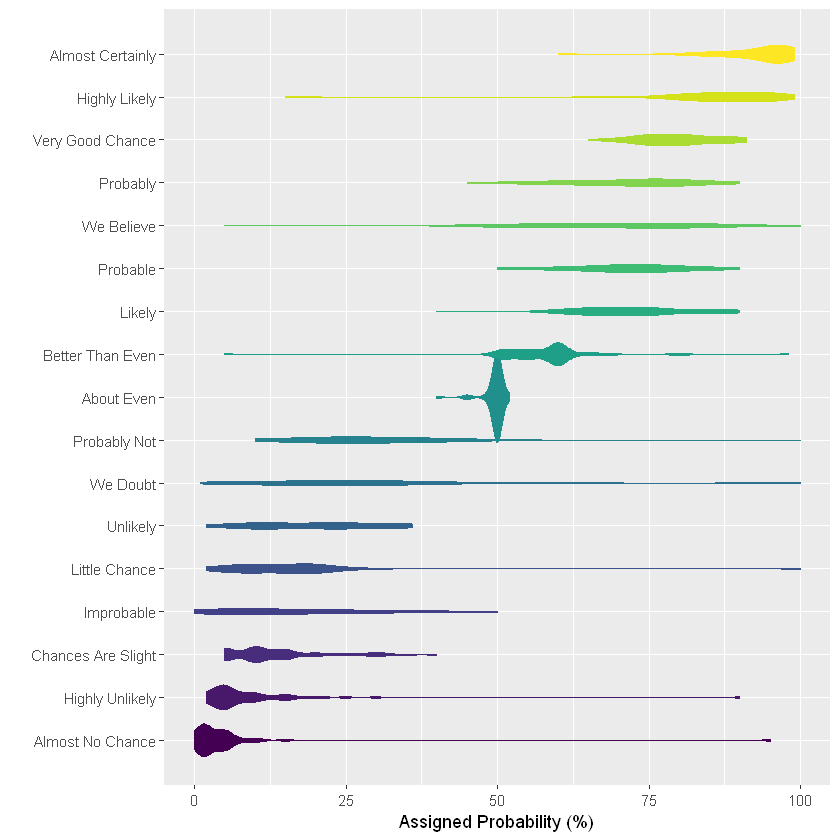

In [106]:
ggplot(data2,  aes(x=text, y=value, fill=text, color=text)) +
geom_violin(width=2.1, size=0.2) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
theme(
  legend.position="none"
) +
coord_flip() +
xlab("") +
ylab("Assigned Probability (%)")

### 密度图
如果只有几组，可以在同一密度图上比较。这里只选择了四组来说明这个想法。如果有更多的组，图形就会变得杂乱无章，难以阅读。这个示例在前面也有提过，但是只能数据组少的情况合适。

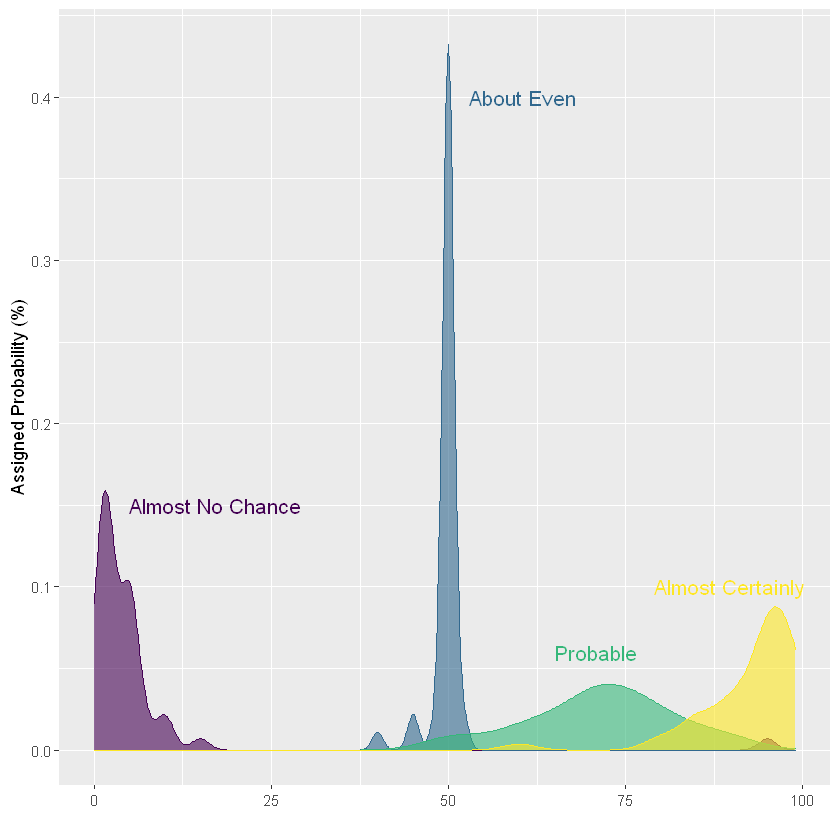

In [107]:
# 绘图
ggplot(data1, aes(x=value, color=text, fill=text)) +
geom_density(alpha=0.6) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
geom_text( data=annot, aes(x=x, y=y, label=text, color=text), hjust=0, size=4.5) +
theme(
  legend.position="none",
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8)
) +
xlab("") +
ylab("Assigned Probability (%)")

但是，如果您有超过4个组，图形会变得过于混乱。如果想用密度图，用分组子图绘图的方式更加合适。这是分别研究每个组分布的好方法。但是，由于它们不共享相同的X轴，因此很难将组放在一起进行比较。一切都取决于您要回答的问题是什么。

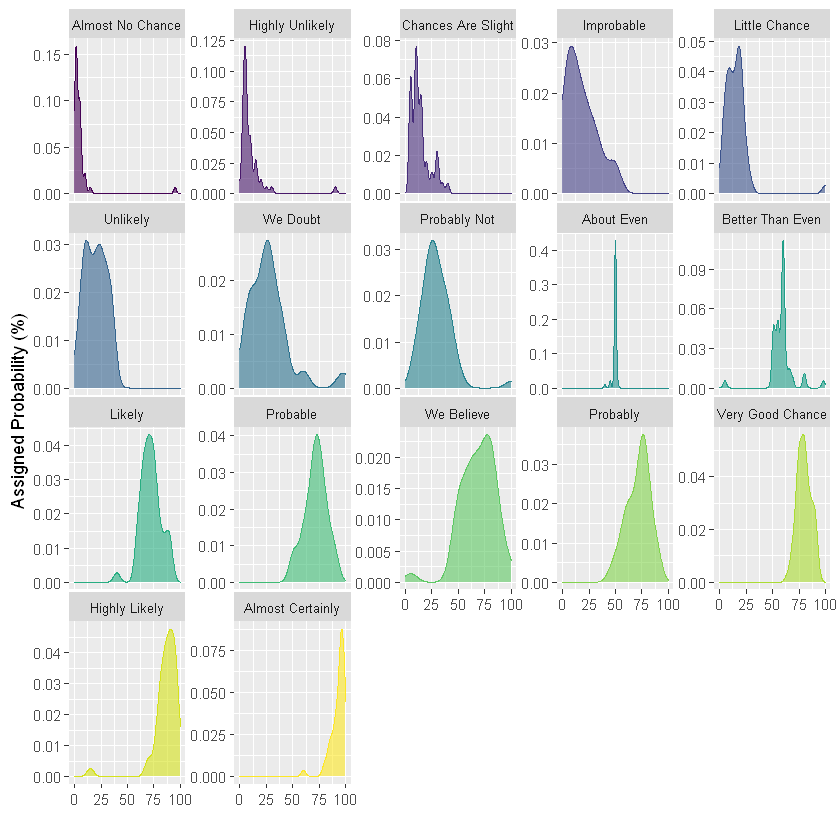

In [108]:
ggplot(data2,aes(x=value, color=text, fill=text)) +
geom_density(alpha=0.6) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
theme(
  legend.position="none",
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8)
) +
xlab("") +
ylab("Assigned Probability (%)") +
# 分组绘图
facet_wrap(~text, scale="free_y")

## 直方图

直方图和密度图非常接近，表现处理方式也是类似，使用子图。但是直方图在这个例子的Y刻度对于每个组都是相同的，这与密度图上的先前示例不同。

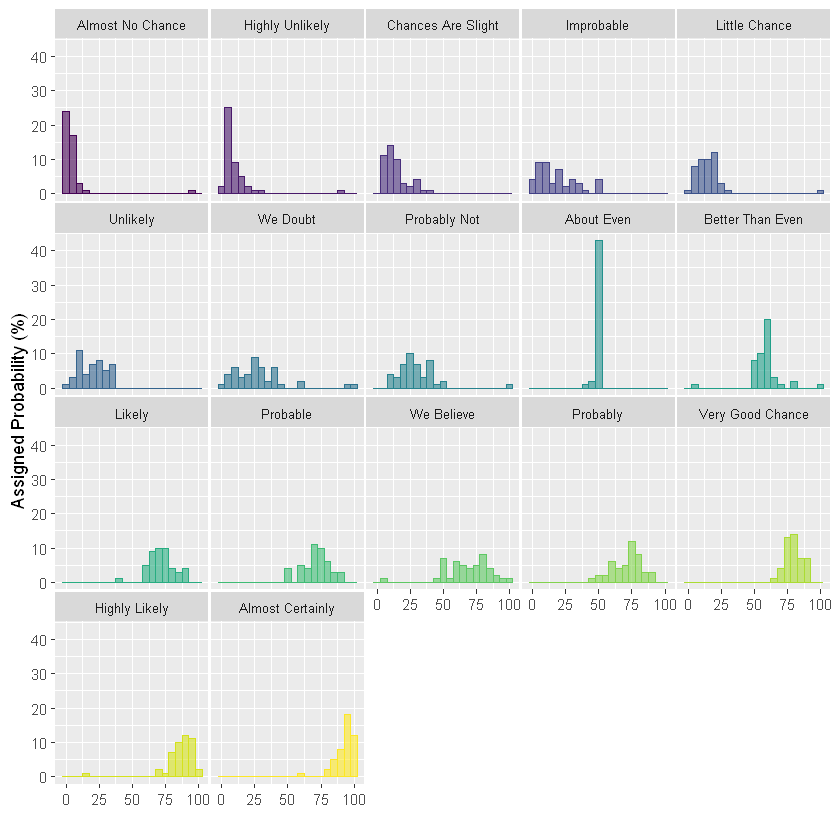

In [109]:
ggplot(data2, aes(x=value, color=text, fill=text)) +
geom_histogram(alpha=0.6, binwidth = 5) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
theme(
  legend.position="none",
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8)
) +
xlab("") +
ylab("Assigned Probability (%)") +
facet_wrap(~text)

### 山脊图
在这个例子中，最好的选择可能是山脊图。它有小提琴图的所有优势，但避免了空间松散，因为组之间存在重叠。有效地描述了个体分布和组之间的比较。

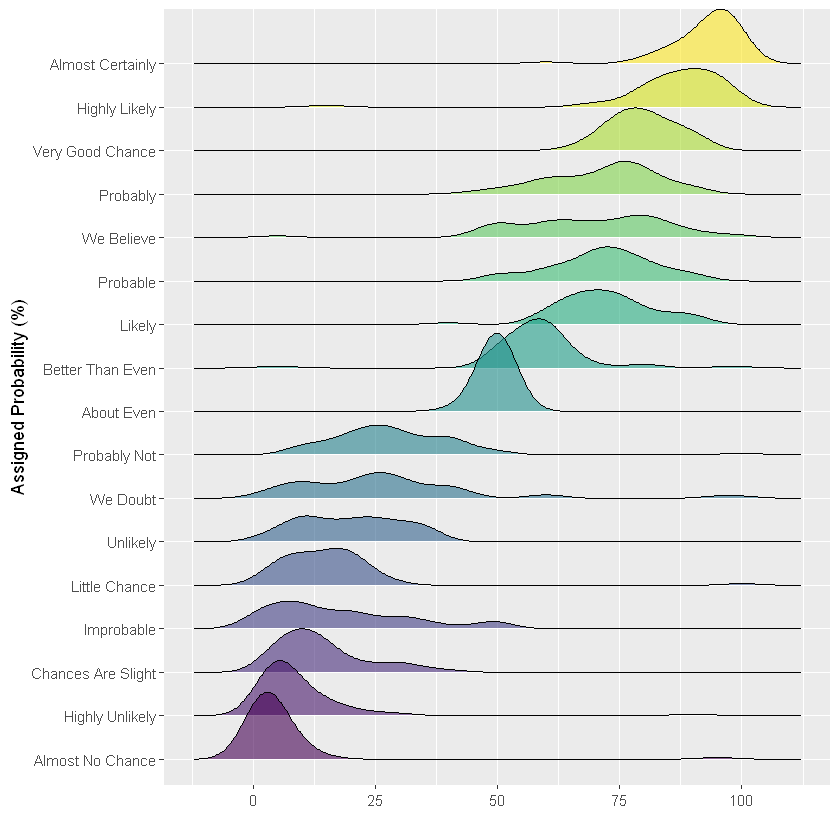

In [110]:
# 加载专门的绘图库
library(ggridges)

ggplot(data2, aes(y=text, x=value,  fill=text)) +
geom_density_ridges(alpha=0.6, bandwidth=4) +
scale_fill_viridis(discrete=TRUE) +
scale_color_viridis(discrete=TRUE) +
theme(
  legend.position="none",
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8)
) +
xlab("") +
ylab("Assigned Probability (%)")

## 参考

+ [TOO MANY DISTRIBUTIONS](https://www.data-to-viz.com/caveat/multi_distribution.html)
+ [PERCEPTION OF PROBABILITY](https://www.data-to-viz.com/story/OneNumOneCatSeveralObs.html)